<a href="https://colab.research.google.com/github/srijanparia/Projects/blob/main/Stock_Price_Prediction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
df = web.DataReader('AAPL', data_source='stooq', start='2012-01-01', end='2019-12-17')
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-17,68.4731,69.0125,68.2837,68.6765,1.166743e+08
2019-12-16,67.8401,68.7722,67.8361,68.5449,1.309864e+08
2019-12-13,66.4862,67.4273,66.3556,67.3914,1.365054e+08
2019-12-12,65.5859,66.7544,65.4723,66.4862,1.406056e+08
2019-12-11,65.8372,66.3975,65.7604,66.3177,8.053014e+07
...,...,...,...,...,...
2012-01-09,12.9525,13.0213,12.8289,12.8408,4.620092e+08
2012-01-06,12.7800,12.8717,12.7630,12.8608,3.734286e+08
2012-01-05,12.6314,12.7422,12.5627,12.7272,3.178972e+08


In [ ]:
df.shape

(2003, 5)

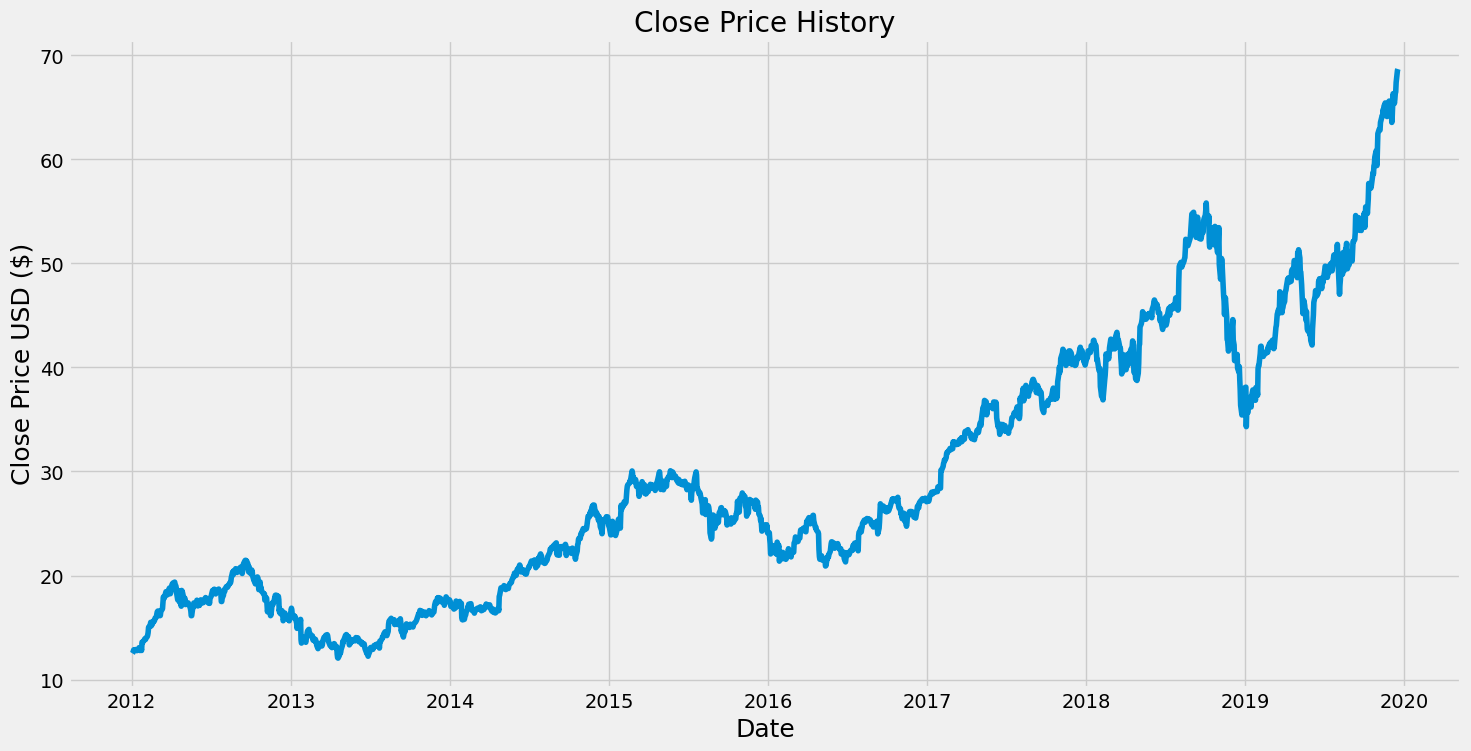

In [ ]:
plt.figure(figsize= (16,8))
plt.title('Close Price History')
plt.plot (df['Close'])
plt.xlabel ('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(["Close"])

dataset = data.values

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1603

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [0.99767542],
       [0.97729999],
       ...,
       [0.01171124],
       [0.00922768],
       [0.00804772]])

In [ ]:
train_data = scaled_data[0:training_data_len , :]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i , 0])
  y_train.append(train_data[i, 0])


In [ ]:
#Convert The x_train , y_train to numpy array
x_train , y_train = np.array(x_train) , np.array(y_train)

In [ ]:
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1],1))

x_train.shape

(1543, 60, 1)

In [ ]:
#Build a LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
#Run cal (Crisentere ved in thissesion optimizer='adam', loss='mean_squared _error')
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 56s 34ms/step - loss: 0.0014


In [ ]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len (test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


13/13 [==============================] - 2s 25ms/step


In [ ]:
rmse=np.sqrt(np.mean((predictions- y_test)**2))
rmse

0.8437323345852444

<ipython-input-23-33d034d9faeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


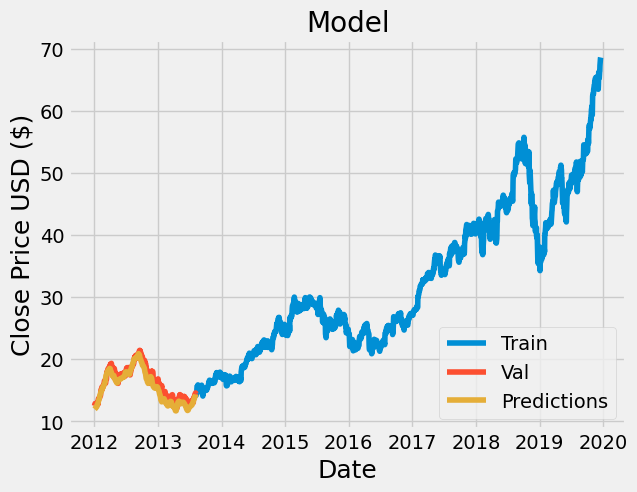

In [ ]:
#plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#vizualization
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val' , 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2013-08-06,14.4679,14.354094
2013-08-05,14.5995,14.200350
2013-08-02,14.3841,14.082693
2013-08-01,14.2026,13.977638
2013-07-31,14.0721,13.872909
...,...,...
2012-01-09,12.8408,12.099466
2012-01-06,12.8608,12.070580
2012-01-05,12.7272,12.050345


In [ ]:
apple_quote = web.DataReader('AAPL', data_source='stooq', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X test data set to a numpy array
X_test = np.array (X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape [0], X_test.shape [1], 1))
#Get the predicted scaled price
pred_price = model.predict (X_test)
#undo the scaling
pred_price = scaler. inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 26ms/step
[[11.941687]]


In [ ]:
apple_quote2 = web.DataReader('AAPL', data_source='stooq', start='2011-12-31', end='2011-12-31')
print(apple_quote2)

Empty DataFrame
Columns: []
Index: []
